In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('TMDB_Data/tmdb_results_combined.csv.gz')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4019 non-null   object 
 1   adult                  4017 non-null   float64
 2   backdrop_path          2303 non-null   object 
 3   belongs_to_collection  341 non-null    object 
 4   budget                 4017 non-null   float64
 5   genres                 4017 non-null   object 
 6   homepage               283 non-null    object 
 7   id                     4017 non-null   float64
 8   original_language      4017 non-null   object 
 9   original_title         4017 non-null   object 
 10  overview               3930 non-null   object 
 11  popularity             4017 non-null   float64
 12  poster_path            3653 non-null   object 
 13  production_companies   4017 non-null   object 
 14  production_countries   4017 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,49666.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,24.0,PG


In [6]:
# how many movies has at least some valid financial information (values > 0 for budget or revenue)? 
has_budget_or_revenue = df[(df['budget'] > 0) | (df['revenue'] > 0)]
has_budget_or_revenue

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,49666.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,24.0,PG
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.110,2476.0,PG
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Flakked, stacked and action-packed!",Heavy Metal 2000,0.0,6.066,197.0,R
10,tt0120202,0.0,/tuerGhZ1lA8wpBjUCEUpeTWDT5B.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.newline.com/properties/stateandmain...,21991.0,en,State and Main,...,9206279.0,106.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,Big movie. Small town. Huge trouble.,State and Main,0.0,6.331,192.0,NaN
11,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,99.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.200,254.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,tt1764172,0.0,NaN,NaN,250000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,228977.0,en,Among Thieves,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A struggling reporter will uncover a truth...t...,Among Thieves,0.0,0.000,0.0,NaN
3949,tt21084824,0.0,/i55bRzHfQcbZogJPJYIFCODsVjV.jpg,NaN,100.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,1226860.0,it,Atlantide La Citta Sommersa,...,0.0,0.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Atlantide La Citta Sommersa,0.0,0.000,0.0,NaN
3969,tt2957918,0.0,NaN,NaN,2000.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,602589.0,en,Toaster,...,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Now is not the time for toast.,Toaster,0.0,0.000,0.0,NaN
3978,tt3314212,0.0,NaN,NaN,250000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,1182321.0,en,A Letter from My Father,...,0.0,75.0,[],Released,NaN,A Letter from My Father,0.0,0.000,0.0,NaN


#### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

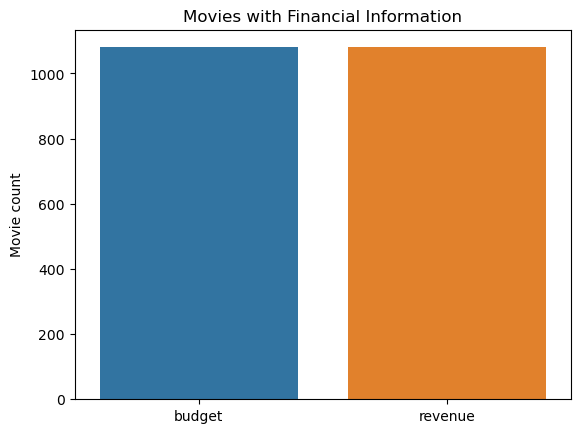

In [64]:
fig, ax = plt.subplots()
sns.countplot(data = has_budget_or_revenue[['budget', 'revenue']])
ax.set(ylabel = 'Movie count', title = 'Movies with Financial Information');

#### How many movies are there in each of the certification categories

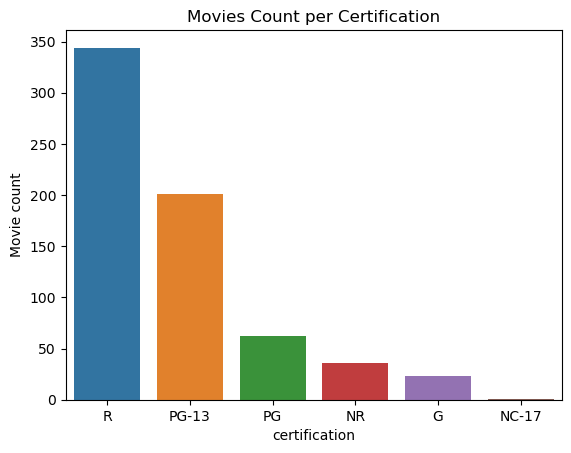

In [67]:
# How many movies are there in each of the certification categories
order = has_budget_or_revenue['certification'].value_counts().index
fig, ax = plt.subplots()
sns.countplot(data = has_budget_or_revenue, x = 'certification', order = order)
ax.set(ylabel = 'Movie count', title = 'Movies Count per Certification');

##### What is the average revenue per certification category?

In [93]:
revenue_per_certication = has_budget_or_revenue.groupby('certification')['revenue'].mean().sort_values(ascending = False)
revenue_per_certication

certification
PG       1.219773e+08
G        1.072460e+08
PG-13    8.914926e+07
R        2.619089e+07
NR       9.538580e+06
NC-17    7.400000e+06
Name: revenue, dtype: float64

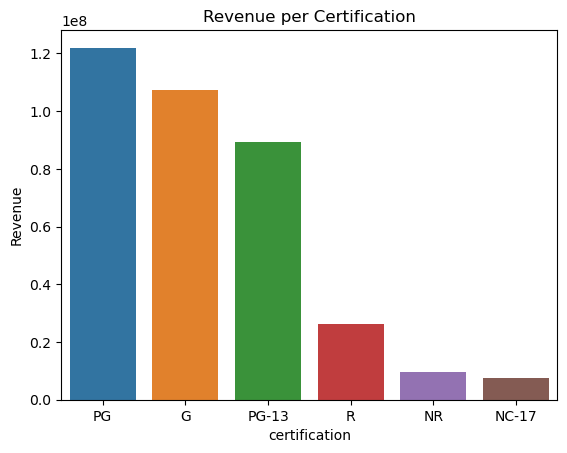

In [95]:
fig, ax = plt.subplots()
sns.barplot(x = revenue_per_certication.index, y = revenue_per_certication.values)
ax.set(ylabel = 'Revenue', title = 'Revenue per Certification');

#### What is the average budget per certification category?


In [96]:
budget_per_cetification = has_budget_or_revenue.groupby('certification')['budget'].mean().sort_values(ascending = False)
budget_per_cetification

certification
PG       4.156165e+07
PG-13    3.960343e+07
G        3.861739e+07
R        1.663160e+07
NR       5.808586e+06
NC-17    4.500000e+06
Name: budget, dtype: float64

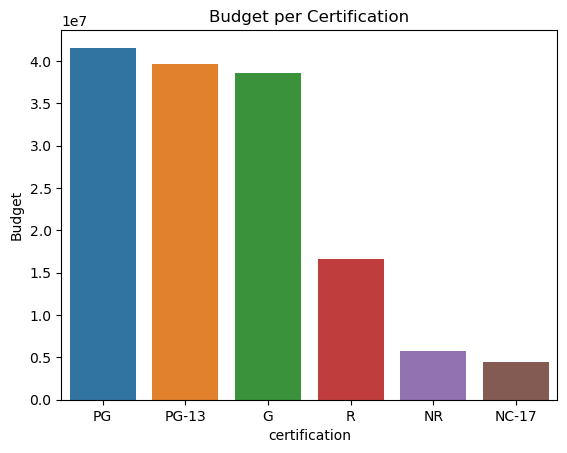

In [99]:
fig, ax = plt.subplots()
sns.barplot(x = budget_per_cetification.index, y = budget_per_cetification.values)
ax.set(ylabel = 'Budget', title = 'Budget per Certification');